## HTT Chapter 18: Classes and Objects - Digging a Little Deeper

based on "How to Think Like a Computer Scientist in Python":

https://runestone.academy/ns/books/published/thinkcspy/ClassesDiggingDeeper/toctree.html

Summaries and this notebook by:

Eric V. Level  
Graduate Programs in Software  
University of St. Thomas, St. Paul, MN  


### Chapter 18.1 - Fractions

We have all had to work with fractions when we were younger. Or, perhaps you do a lot of cooking and have to manage measurements for ingredients. In any case, fractions are something that we are familiar with. In this chapter we will develop a class to represent a fraction including some of the most common methods that we would like fractions to be able to do.

A fraction is most commonly thought of as two integers, one over the other, with a line separating them. The number on the top is called the numerator and the number on the bottom is called the denominator. Sometimes people use a slash for the line and sometimes they use a straight line. The fact is that it really does not matter so long as you know which is the numerator and which is the denominator.

To design our class, we simply need to use the analysis above to realize that the state of a fraction object can be completely described by representing two integers. We can begin by implementing the `Fraction` class and the `__init__` method which will allow the user to provide a numerator and a denominator for the fraction being created.

In [1]:
# _18_1_1_fractions_init.py

class Fraction:

    def __init__(self, top, bottom):

        self.num = top        # the numerator is on top
        self.den = bottom     # the denominator is on the bottom

    def __str__(self):
        return str(self.num) + "/" + str(self.den)

    def getNum(self):
        return self.num

    def getDen(self):
        return self.den

myfraction = Fraction(3, 4)
print(myfraction)

print(myfraction.getNum())
print(myfraction.getDen())


3/4
3
4


Note that the `__str__` method provides a “typical” looking fraction using a slash between the numerator and denominator. The figure below shows the state of `myfraction`. We have also added a few simple accessor methods, `getNum` and `getDen`, that can return the state values for the fraction.

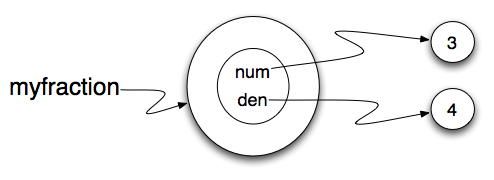

### Chapter 18.2 - Objects are Mutable

We can change the state of an object by making an assignment to one of its instance variables. For example, we could change the numerator of the fraction by assigning a new value to `self.num`. Likewise, we could do the same thing for `self.den`.

One place where this type of modification makes sense is when we place a fraction in lowest terms. Lowest terms simply means that the numerator and denominator do not share any common factors. For example, `12/16` is a fraction but it is not in lowest terms since `2` can divide into both `12` and `16`. We call `2` a common divisor. If we divide the numerator and the denominator by a common divisor, we get an equivalent fraction. If we divide by the greatest common divisor, we will get the lowest terms representation. In this case `4` would be the greatest common divisor and the lowest terms representation would be `3/4`.

There is a very nice iterative method for computing the greatest common divisor of two integers. Try to run the function on a number of different examples.

In [2]:
# _18_2_1_fractions_gcd.py

def gcd(m, n):
    while m % n != 0:
        oldm = m
        oldn = n

        m = oldn
        n = oldm % oldn

    return n

print(gcd(12, 16))


4


Now that we have a function that can help us with finding the greatest common divisor, we can use that to implement a fraction method called `simplify`. We will ask the fraction “to put itself in lowest terms”.

The simplify method will pass the numerator and the denominator to the `gcd` function to find the greatest common divisor. It will then modify itself by dividing its `num` and its `den` by that value.

In [3]:
# _18_2_2_fractions_simplify.py

def gcd(m, n):
    while m % n != 0:
        oldm = m
        oldn = n

        m = oldn
        n = oldm % oldn

    return n

class Fraction:

    def __init__(self, top, bottom):

        self.num = top        # the numerator is on top
        self.den = bottom     # the denominator is on the bottom

    def __str__(self):
        return str(self.num) + "/" + str(self.den)

    def simplify(self):
        common = gcd(self.num, self.den)

        self.num = self.num // common
        self.den = self.den // common

myfraction = Fraction(12, 16)

print(myfraction)
myfraction.simplify()
print(myfraction)


12/16
3/4


There are two important things to note about this implementation. First, the `gcd` function is not a method of the class. It does not belong to `Fraction`. Instead it is a function that is used by `Fraction` to assist in a task that needs to be performed. This type of function is often called a helper function. Second, the simplify method does not return anything. Its job is to modify the object itself. This type of method is known as a **mutator method** because it mutates or changes the internal state of the object.

### 18.3 – Sameness

The meaning of the word same seems perfectly clear until you give it some thought and then you realize there is more to it than you expected.

For example, if you say, Chris and I have the same car, you mean that his car and yours are the same make and model, but that they are two different cars. If you say, Chris and I have the same mother, you mean that his mother and yours are the same person.

When you talk about objects, there is a similar ambiguity. For example, if two `Fraction`s are the same, does that mean they represent the same rational number or that they are actually the same object?

We’ve already seen the `is` operator in the chapter on lists, where we talked about aliases. It allows us to find out if two references refer to the same object.

In [4]:
# _18_3_1_fractions_is.py

class Fraction:

    def __init__(self, top, bottom):

        self.num = top        # the numerator is on top
        self.den = bottom     # the denominator is on the bottom

    def __str__(self):
        return str(self.num) + "/" + str(self.den)


myfraction = Fraction(3, 4)
yourfraction = Fraction(3, 4)
print(myfraction is yourfraction)

ourfraction = myfraction
print(myfraction is ourfraction)

False
True


Even though `myfraction` and `yourfraction` refer to the same rational number, they are not the same object.
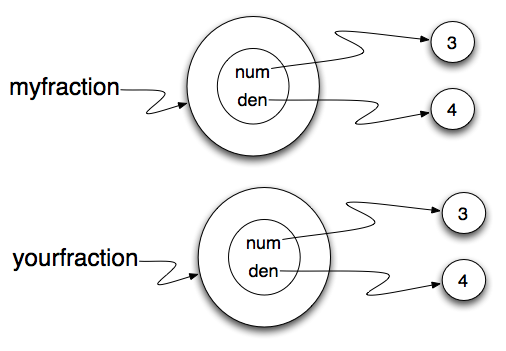

If we assign `myfraction` to `ourfraction`, then the two variables are aliases of the same object.

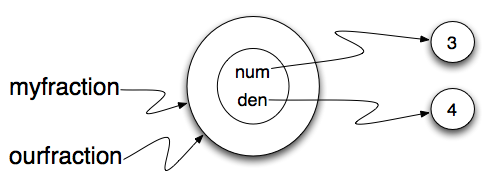

This type of equality is called **shallow equality** because it compares only the references, not the contents of the objects. Using the `==` operator to check equality between two user defined objects will return the shallow equality result. In other words, the `Fraction` objects are equal (`==`) if they are the same object.

Of course, we could define equality to mean the fractions are the same in that they represent the same rational number. Recall from algebra that `a/b = c/d` is equivalent to `a*d = b*c`. Here is a boolean function that performs this check.

In [5]:
def sameRational(f1, f2):
    return f1.getNum()*f2.getDen() == f2.getNum() * f1.getDen()

This type of equality is known as ***deep equality*** since it compares the values “deep” in the object, not just the reference to the object.

In [6]:
# _18_3_2_fractions_eq1.py

def sameRational(f1, f2):
    return f1.getNum()*f2.getDen() == f2.getNum() * f1.getDen()

class Fraction:

    def __init__(self, top, bottom):

        self.num = top        # the numerator is on top
        self.den = bottom     # the denominator is on the bottom

    def __str__(self):
        return str(self.num) + "/" + str(self.den)

    def getNum(self):
        return self.num

    def getDen(self):
        return self.den


myfraction = Fraction(3, 4)
yourfraction = Fraction(3, 4)
print(myfraction is yourfraction)
print(sameRational(myfraction, yourfraction))
notInLowestTerms = Fraction(15, 20)
print(sameRational(myfraction, notInLowestTerms))


False
True
True


Of course, if the two variables refer to the same object, they have both shallow and deep equality.

***Beware of ==***

“When I use a word,” Humpty Dumpty said, in a rather scornful tone, “it means just what I choose it to mean — neither more nor less.” Alice in Wonderland

Python has a powerful feature that allows a designer of a class to decide what an operation like `==` or `<` should mean. (We’ve just shown how we can control how our own objects are converted to strings, so we’ve already made a start!) We’ll cover more detail later. But sometimes the implementors will attach shallow equality semantics, and sometimes deep equality, as shown in this little experiment:

In [7]:
p = Fraction(4, 2)
s = Fraction(4, 2)
print("== on Fractions returns", p == s)  # by default, == does a shallow equality test here

a = [2, 3,[1,2]]
b = [2, 3,[1,2]]
print("== on lists returns",  a == b)  # by default, == does a deep equality test on lists

== on Fractions returns False
== on lists returns True


This outputs:

``` 
== on Fractions returns False 
== on lists returns True 
```

So we conclude that even though the two lists (or tuples, etc.) are distinct objects with different memory addresses, in one case the `==` operator tests for deep equality, while in the case of points it makes a shallow test.

### 18.4 – Arithmetic Methods

We will conclude this chapter by adding a few more methods to our `Fraction` class. In particular, we will implement arithmetic. To begin, consider what it means to add two fractions together. Remember that you can only add fractions if they have the same denominator. The easiest way to find a common denominator is to multiply the two individual denominators together. Anything we do to the denominator needs to the done to the numerator. This gives us the following equation for fraction addition:

```
a/b + c/d = (ad + cb)/bd
```

Our add method will take a `Fraction` as a parameter. It will return a new `Fraction` representing the sum. We will use the equation shown above to compute the new numerator and the new denominator. Since this equation will not give us lowest terms, we will utilize a similar technique as was used in the simplify method to find the greatest common divisor and then divide each part of the new fraction.

```
def add(self,otherfraction):

    newnum = self.num*otherfraction.den + self.den*otherfraction.num
    newden = self.den * otherfraction.den

    common = gcd(newnum,newden)

    return Fraction(newnum//common,newden//common)
```

You can try the addition method and then modify the fractions and retry.

In [10]:
# _18_4_1_fractions_add1.py

def gcd(m, n):
    while m % n != 0:
        oldm = m
        oldn = n

        m = oldn
        n = oldm % oldn

    return n

class Fraction:

    def __init__(self, top, bottom):

        self.num = top        # the numerator is on top
        self.den = bottom     # the denominator is on the bottom

    def __str__(self):
        return str(self.num) + "/" + str(self.den)

    def simplify(self):
        common = gcd(self.num, self.den)

        self.num = self.num // common
        self.den = self.den // common

    def add(self,otherfraction):

        newnum = self.num*otherfraction.den + self.den*otherfraction.num
        newden = self.den * otherfraction.den

        common = gcd(newnum, newden)

        return Fraction(newnum // common, newden // common)
    
    def __add__(self, otherfraction):

        newnum = self.num*otherfraction.den + self.den*otherfraction.num
        newden = self.den * otherfraction.den

        common = gcd(newnum, newden)

        return Fraction(newnum // common, newden // common)


f1 = Fraction(1, 2)
f2 = Fraction(1, 4)

f3 = f1.add(f2)
print(f3)

print(f1 + f2)

3/4
3/4


One final modification to this method will be quite useful. Instead invoking the add method, we can use the addition operator “+”. This requires that we implement another special method, this time called __add__. The details of the method are the same.

```
# added to above code...

def __add__(self, otherfraction):

    newnum = self.num*otherfraction.den + self.den*otherfraction.num
    newden = self.den * otherfraction.den

    common = gcd(newnum, newden)

    return Fraction(newnum // common, newden // common)
```

However, now we can perform addition in the same manner that we are used to with other numeric data.

In [11]:
f1 = Fraction(1, 2)
f2 = Fraction(1, 4)

f3 = f1 + f2    # calls the __add__ method of f1
print(f3)

3/4


### 18.5 – Glossary

Know these!

***deep copy***

To copy the contents of an object as well as any embedded objects, and any objects embedded in them, and so on; implemented by the deepcopy function in the copy module.

***deep equality***

Equality of values, or two references that point to objects that have the same value.

***shallow copy***

To copy the contents of an object, including any references to embedded objects; implemented by the copy function in the copy module.

***shallow equality***

Equality of references, or two references that point to the same object.